In [1]:
import critical_loads as cl
import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
import seaborn as sn

plt.style.use("ggplot")

In [2]:
# Connect to PostGIS
eng = nivapy.da.connect_postgis(database="critical_loads")

Connection successful.


In [3]:
# Read stations
stn_df = pd.read_excel("NILU_sites_BLR.xlsx", sheet_name="NILU_sites_BLR")
stn_df.head()

,OBJECTID,FID_NILU_sites,Code,Station_na,latitude,longitude,alt,latitude_c,longitude_,FID_blrgrid_uten_grums,BLR,area_m2
0,35.0,35.0,,Andøya,,,380.0,69.266667,16.000100,1881.0,69016005,3.948683e+07
1,2.0,28.0,,Birkenes,,,190.0,58.383333,8.250000,30.0,58008001,2.039518e+08
2,17.0,31.0,,Brekkebygda,,,390.0,60.300000,9.733333,413.0,60009007,1.927103e+08
3,22.0,25.0,NO0798R,Fagernes,"60°59'00""""N","009°15'00""""E",NaN,60.983333,9.250000,538.0,60509001,1.890960e+08
4,18.0,30.0,,Gulsvik,,,260.0,60.366667,9.650000,413.0,60009007,1.927103e+08


In [4]:
# Show series already in database
with pd.option_context("display.max_colwidth", -1):
    ser_grid = cl.view_dep_series(eng)
    display(ser_grid)

,series_id,name,short_name,grid,description
0,1,Middel 1978-1982,7882,blr,Fordelt til BLR av NILU 2002
1,2,Middel 1992-1996,9296,blr,Fordelt til BLR av NILU 2002
2,3,Middel 1997-2001,9701,blr,Fordelt til BLR av NILU 2002
3,4,Middel 2002-2006,0206,blr,Fordelt til BLR av NILU 2008 (Wenche Aas)
4,5,Beregnet 2010,None,None,"Gøteborg protokollen 1999. ""Gamle"""
5,6,Middel 1983-1987,None,None,Tall fra den gamle tålegrensebasen(D_S/N). OBS Verdier omgjort fra g til mg
6,7,Middel 1988-1992,None,None,Tall fra den gamle tålegrensebasen(D-S90) NB kun S.OBS Verdier omgjort fra g til mg
7,8,"2010 (EMEP/CCE 2008) ""his""",None,None,NB: konvertert fra ekv/ha/yr til mekv/m2/yr (/10). 24.10.1010. TOH Her er det noe rart
8,9,"2020 (EMEP/CCE 2008) ""MFR""",None,None,NB: konvertert fra ekv/ha/yr til mekv/m2/yr (/10) 24.10.1010. TOH Her er det noe rart
9,10,"2020 (EMEP/CCE 2008) ""CLE""",None,None,NB: konvertert fra ekv/ha/yr til mekv/m2/yr (/10) 24.10.1010. TOH Her er det noe rart


In [5]:
# Get example of EMEP grid
gdf = cl.extract_deposition_as_gdf(59, "nitrogen", eng, veg_class="grid average")

# Assign EMEP cell IDs to points
stn_df = nivapy.spatial.identify_point_in_polygon(
    stn_df, gdf, "Station_na", "cell_id", lat_col="latitude_c", lon_col="longitude_"
)
stn_df.head()

,OBJECTID,FID_NILU_sites,Code,Station_na,latitude,longitude,alt,latitude_c,longitude_,FID_blrgrid_uten_grums,BLR,area_m2,cell_id
0,35.0,35.0,,Andøya,,,380.0,69.266667,16.000100,1881.0,69016005,3.948683e+07,6937516250
1,2.0,28.0,,Birkenes,,,190.0,58.383333,8.250000,30.0,58008001,2.039518e+08,5837508250
2,17.0,31.0,,Brekkebygda,,,390.0,60.300000,9.733333,413.0,60009007,1.927103e+08,6037509750
3,22.0,25.0,NO0798R,Fagernes,"60°59'00""""N","009°15'00""""E",NaN,60.983333,9.250000,538.0,60509001,1.890960e+08,6087509250
4,18.0,30.0,,Gulsvik,,,260.0,60.366667,9.650000,413.0,60009007,1.927103e+08,6037509750


In [6]:
# Series of interest
ser_ids = range(31, 60)

# Cell IDs of interest
cell_id_list = list(stn_df["cell_id"].unique())

# Loop over series
df_list = []
for ser_id in ser_ids:
    # Get series name
    name = ser_grid.query("series_id == @ser_id")["name"].values[0]

    # Get dep data from database
    n_df = cl.extract_deposition_as_gdf(
        ser_id, "nitrogen", eng, veg_class="grid average"
    )
    n_df = pd.DataFrame(n_df[["cell_id", "ndep_mgpm2pyr"]])

    s_df = cl.extract_deposition_as_gdf(
        ser_id, "sulphur", eng, veg_class="grid average"
    )
    s_df = pd.DataFrame(s_df[["cell_id", "sdep_mgpm2pyr"]])

    # Combine
    df = pd.merge(n_df, s_df, on="cell_id", how="inner")
    df["series_id"] = ser_id
    df["series_name"] = name

    # Just cells of interest
    df = df.query("cell_id in @cell_id_list")

    df_list.append(df)

# Merge and tidy
df = pd.concat(df_list, axis="rows", sort=True)
df = pd.merge(df, stn_df[["cell_id", "Station_na"]], on="cell_id", how="outer")
df.sort_values(["Station_na", "series_name"], inplace=True)
df.rename({"Station_na": "site_name"}, inplace=True, axis="columns")
df["year"] = df["series_name"].str[-4:].astype(int)
df = df[
    [
        "site_name",
        "cell_id",
        "series_id",
        "series_name",
        "year",
        "ndep_mgpm2pyr",
        "sdep_mgpm2pyr",
    ]
]
df.reset_index(inplace=True)

df.to_csv("nilu_sites_dep.csv", index=False)

df.head()

,index,site_name,cell_id,series_id,series_name,year,ndep_mgpm2pyr,sdep_mgpm2pyr
0,870,Andøya,6937516250,31,EMEP 1880,1880,76.0,108.0
1,871,Andøya,6937516250,32,EMEP 1885,1885,77.0,110.0
2,872,Andøya,6937516250,33,EMEP 1890,1890,76.0,114.0
3,873,Andøya,6937516250,34,EMEP 1895,1895,79.0,115.0
4,874,Andøya,6937516250,35,EMEP 1900,1900,81.0,123.0


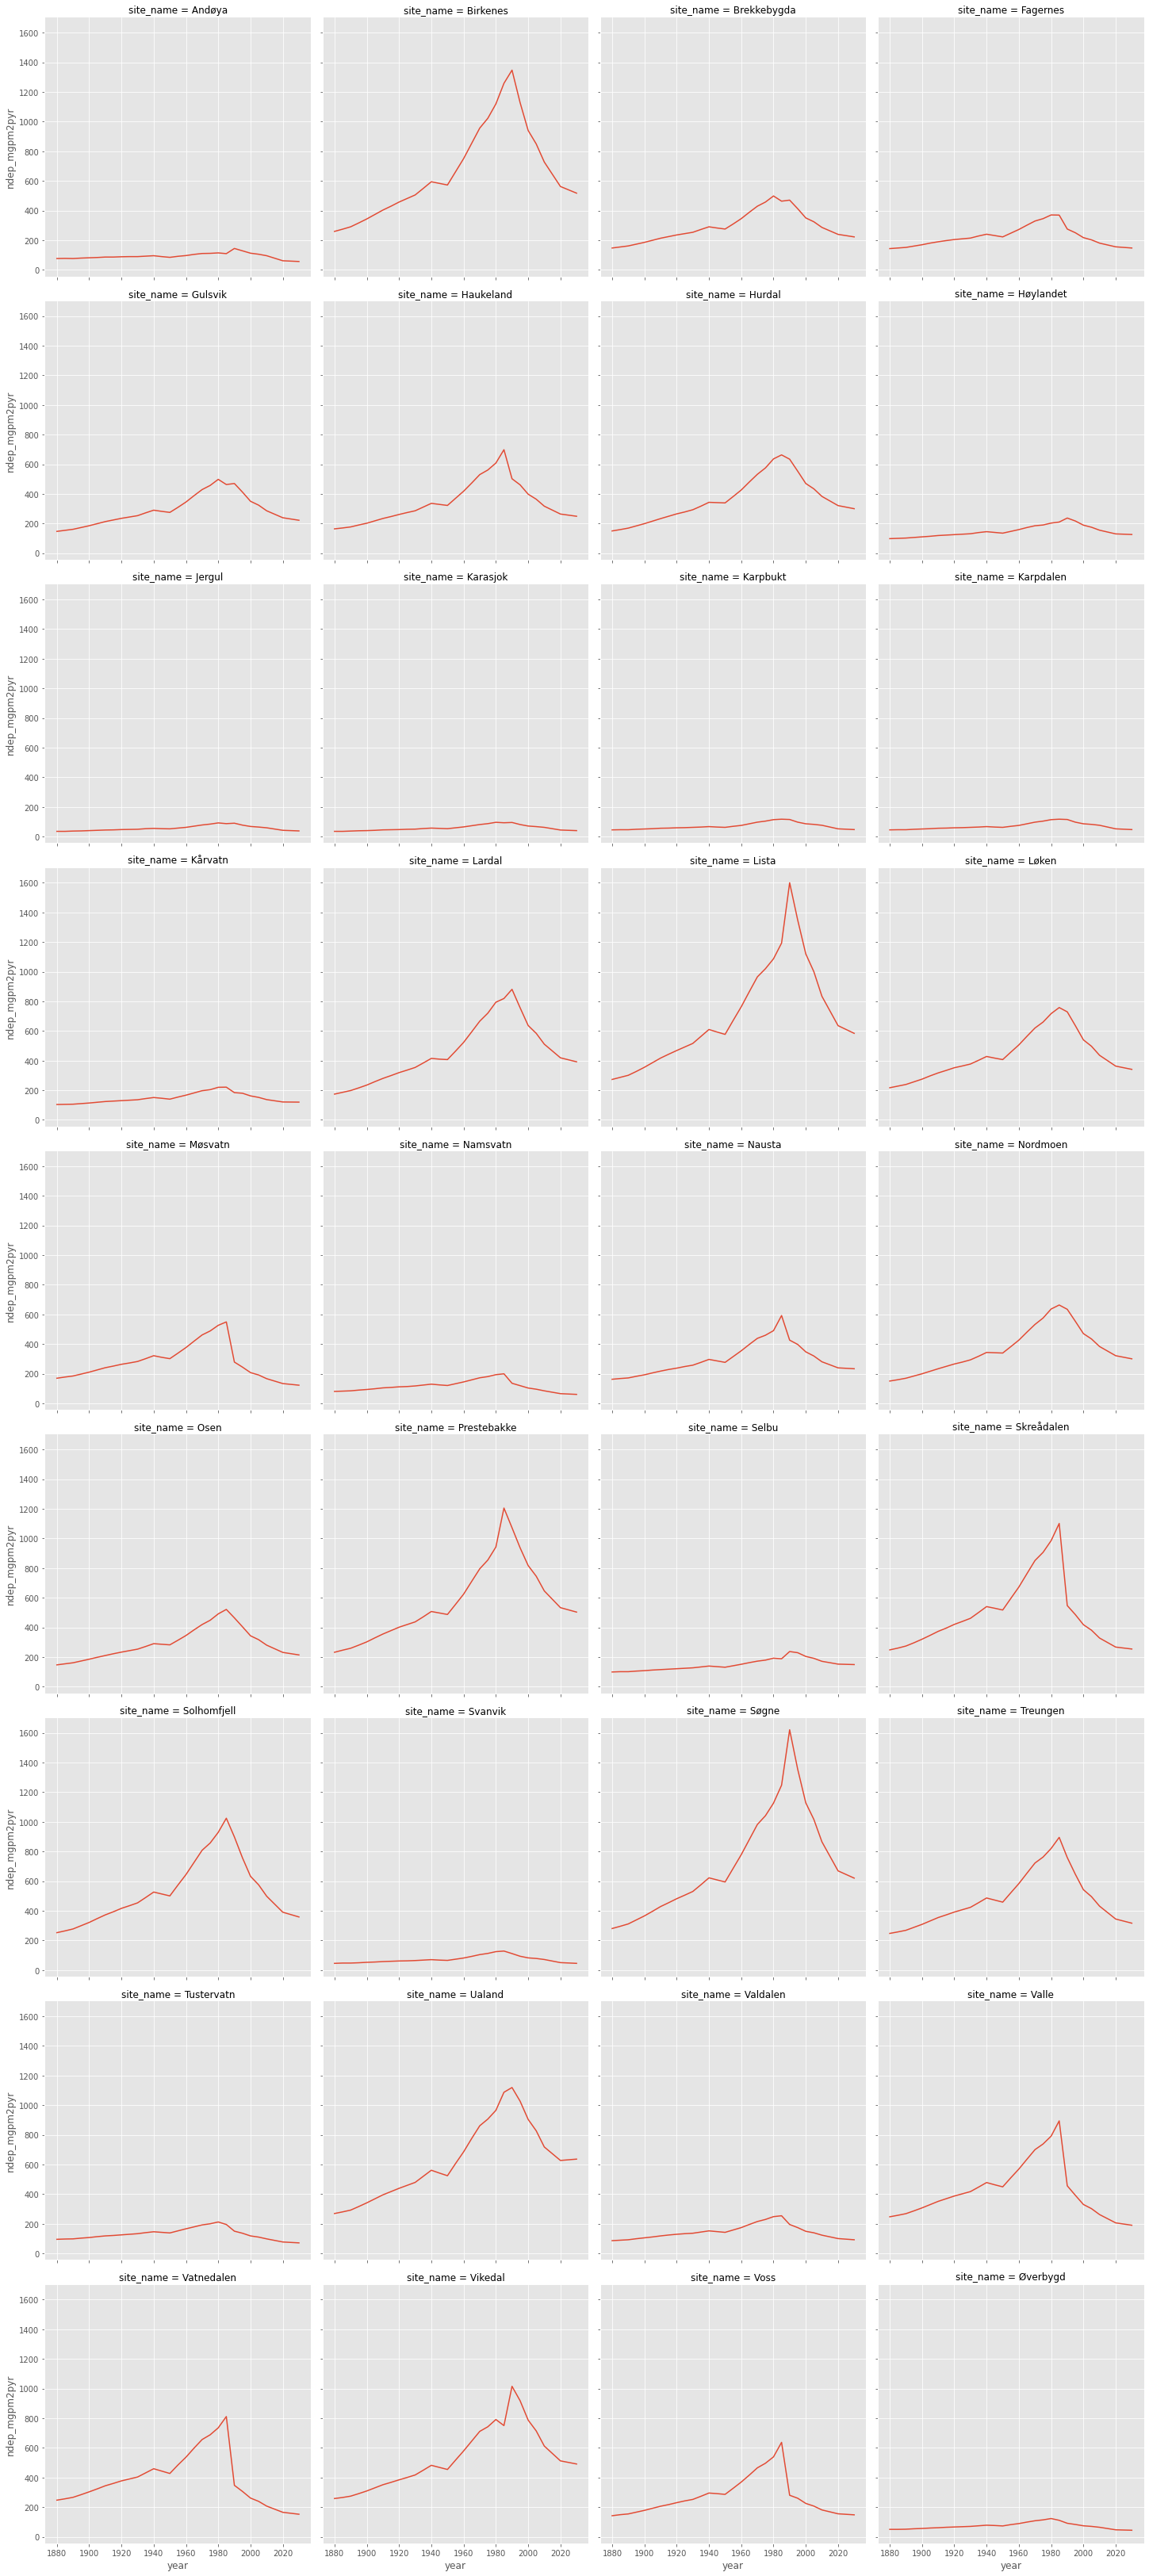

In [10]:
sn.relplot(
    data=df,
    x="year",
    y="ndep_mgpm2pyr",
    col="site_name",
    col_wrap=4,
    kind="line",
    col_order=sorted(stn_df["Station_na"]),
)

plt.savefig("emep_ndep_nilu_sites", dpi=200)

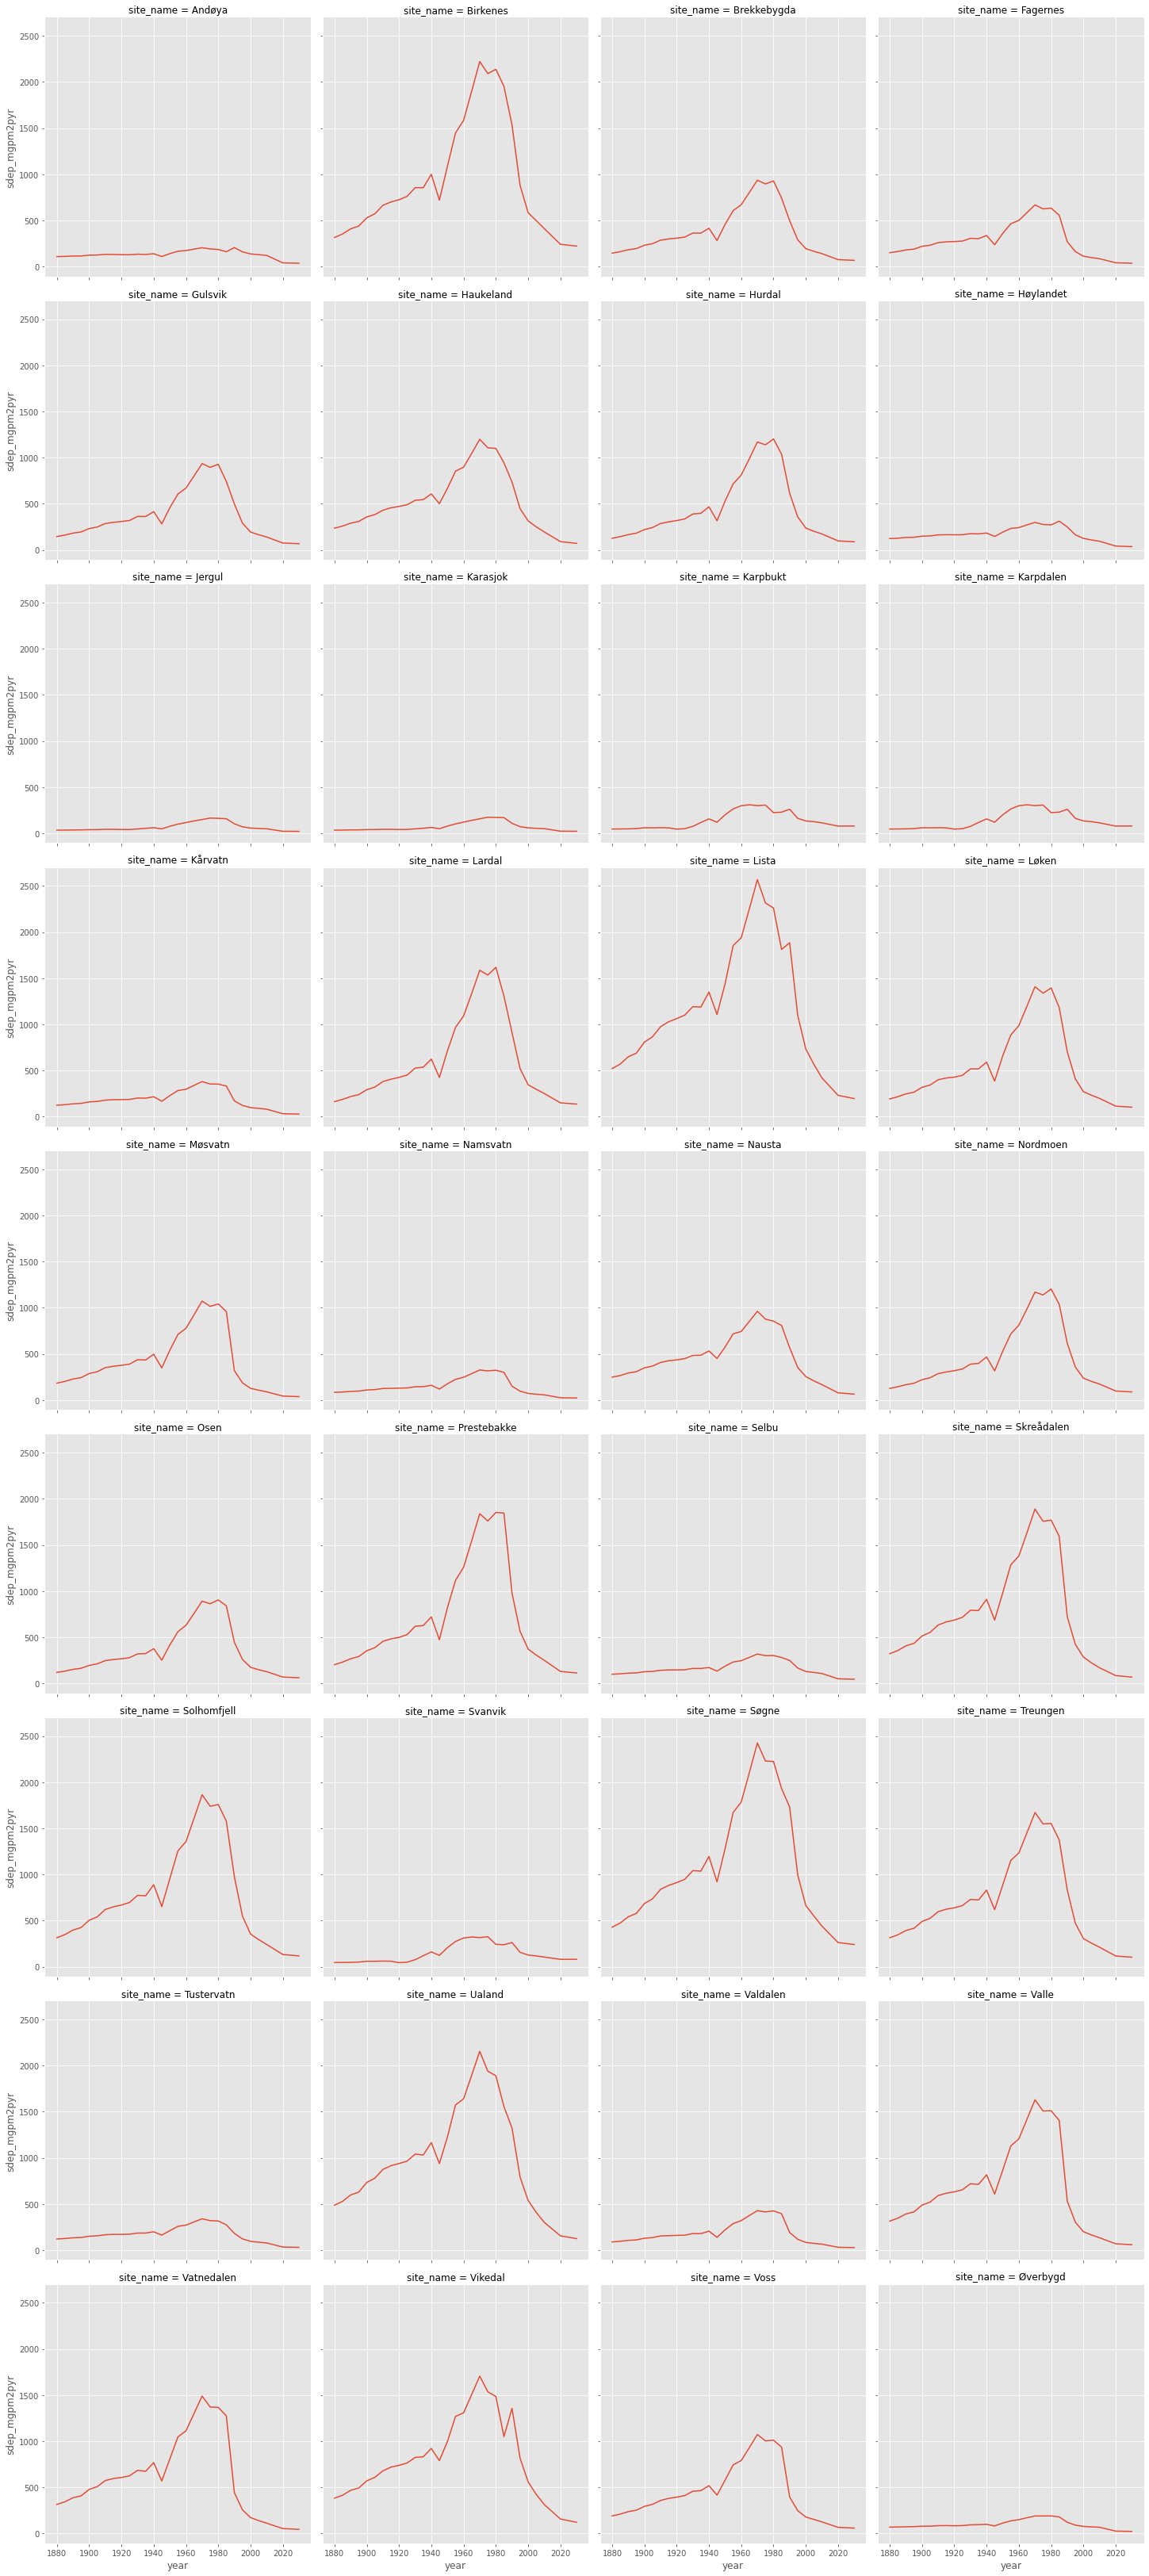

In [11]:
sn.relplot(
    data=df,
    x="year",
    y="sdep_mgpm2pyr",
    col="site_name",
    col_wrap=4,
    kind="line",
    col_order=sorted(stn_df["Station_na"]),
)

plt.savefig("emep_sdep_nilu_sites.png", dpi=200)